#Fundamentos del Método de Monte Carlo





En esta práctica aprenderán a programar el algoritmo de Metropolis-Hastings para simular variables aleatorias.<br>

La idea del algoritmo para simular variables aleatorias con distribución $π$ es la siguiente:
1. Se toma una semilla $X_0 =x_0$
**Simulación de un nuevo estado**<br>
1. Dado $X_n =x$, se elige el salto potencial a un estado $Y_n$ con probabilidad de salto $q(x,y)$ (un candidato para el siguiente valor de muestra y, dado el valor de muestra anterior $x$) simulamos
$$Y_n ∼q(x,y)$$
**Calculo de la probabilidad de aceptación**
$$
 X_{n+1} = \begin{cases}
       y  &\quad\text{con probabilidad }\alpha(x,y)\\
       x  &\quad\text{con probabilidad }1-\alpha(x,y)\\
     \end{cases}
$$
donde
$$
α(x,y)=min \bigg\{1, \frac{π(y)q(y,x)}{π(x)q(x,y)}\bigg\}
$$

**Observación:** $α(x,y)∈[0,1]$<br>

$q(x,y)$ un kernel de transición de probabilidad y puede haber diferentes propuestas del mismo. <br>
Una propuesta conveniente de $q(x,y)$ es la siguiente:

$$q(x,y)=f_{U_{xr}} (y)∼Unif(x−r,x+r)$$

donde $f_{U_{xr}}$ es la función de densidad de una $Uniforme(x−r,x+r)$ con $r∈R$.

Esto resulta muy conveniente porque las uniformes son fáciles de simular y además resulta que $q(x,y)=q(y,x)$ ya que:
$$
q(x,y)=f_{U_{xr}}(y) = \begin{cases}
        \frac{1}{2r} &\quad\text{si }|y−x|<r\\
       0  &\quad\text{en otro caso }\\
     \end{cases}\\
q(y,x)=f_{U_{yr}}(x) = \begin{cases}
        \frac{1}{2r} &\quad\text{si }|x-y|<r\\
       0  &\quad\text{en otro caso }\\
     \end{cases}     
$$

y así $α(x,y)$ se simplifica a

$$α(x,y)=min \bigg\{1, \frac{π(y)}{π(x)}\bigg\}$$

**Ejercicios:**<br>
En estos ejercicios contruiremos paso a paso el algoritmo de Metropolis-Hastings para generar números aleatorios provenientes de la distribución $Beta(a,b)$. <br>
Es decir $π=beta(a,b)$

**Ejercicio 1:**<br>
Define una función que reciba como parámetros:

- $x$
- $a$
- $b$

que se encarga de evaluar la función de densidad de la distribución $beta(a,b)$ en $x$. Luego, grafica la función de densidad en el intervalo $(0,1)$ usando los siguientes parámetros y muestra todas las curvas en una sola gráfica. <br>

**Parámetros:**

- a=0.5, b=0.5
- a=5, b=1
- a=1, b=3
- a=2, b=2
- a=2, b=5

Recuerda que la función de densidad de la $beta(a,b)$ está dada por
$$f(x)= \frac{x^{a−1} (1−x)^{b−1}} {B(a,b)} \quad \text{si } 0<x<1 $$
donde **$B(a,b)$ es la función Beta**, se define como
$$ B(a,b)=∫ _0^1 x^{a−1} (1−x)^{b−1} dx $$
Para calcular **función Beta** puedes usar ``scipy.special.beta``, la cual ya encontrarás importada en la siguiente linea de código como beta

In [49]:
import matplotlib.pyplot as plt
from scipy.special import beta
beta(1,1)

1.0

In [50]:
import numpy as np
import random

In [51]:
def densidad (a,b,x):
  if 0<x<1:
    return x**(a-1)*(1-x)**(b-1)/beta(a,b)
  else:
    return 0

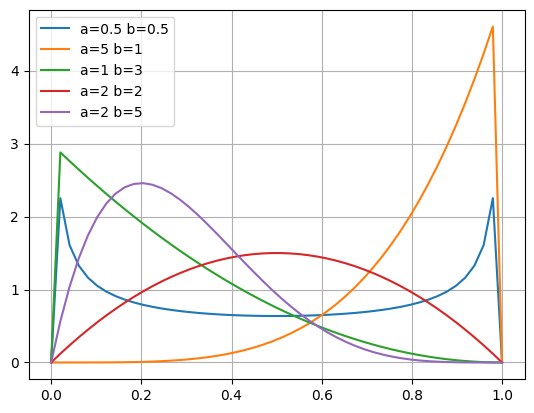

In [52]:
X=np.linspace(0,1)
Y1=[densidad(.5,.5,X[i]) for i in range (len(X))]
Y2=[densidad(5,1,X[i]) for i in range (len(X))]
Y3=[densidad(1,3,X[i]) for i in range (len(X))]
Y4=[densidad(2,2,X[i]) for i in range (len(X))]
Y5=[densidad(2,5,X[i]) for i in range (len(X))]
plt.plot(X, Y1,label='a=0.5 b=0.5')
plt.plot(X, Y2,label='a=5 b=1')
plt.plot(X, Y3,label='a=1 b=3')
plt.plot(X, Y4,label='a=2 b=2')
plt.plot(X, Y5,label='a=2 b=5')
plt.legend()
plt.grid()

**Ejercicio 2:**<br>
Observa que en el cálculo computacional de $α(x,y)$ puede haber un error destruya al algoritmo. Este error se debe a que hay valores de x para los cuales $π(x)=0$ y entonces $\frac{π(y)}{π(x)}$ no está definido. Sin embargo podemos corregir ese error pidiendo
$$
α(x,y) = \begin{cases}
       1  &\quad\text{si }π(x)=0\\
       min \bigg\{1, \frac{π(y)}{π(x)}\bigg\}  &\quad\text{en otro caso}\\
     \end{cases}
$$
Programa una función que reciba como parámetros a
- $x$
- $y$
- $π$

y que calcule $α(x,y)$ tomando en cuenta el problema mencionado anteriormente.

In [53]:
def alfa (pi,x,y):
  if pi(x)==0:
    return 1
  else:
    A=[1,pi(y)/pi(x)]
    return min(A)

**Ejercicio 3:**<br>
En este ejercicio deberán programar una función que se encargue de los pasos 2) y 3) del algoritmo de Metropolis-Hastings. Para ello su función deberá recibir
- el valor $x$ del estado $X_n$
- el tamaño del paso de la distribución uniforme, $r$
- la función de distribución $π$

como parámetros y deberá hacer lo siguiente: <br>

**Simulación de un nuevo estado**<br>

1. Generar y usando $q(x,y)=f_{U_{xr}}(y)$. Para esto simplemente deben simular una variable aleatoria $Uniforme(x−r,x+r)$ y asignarle ese valor a $y$.

**Calcular la probabilidad de aceptación**<br>

1. Calcular el valor de $α(x,y)$ usando la función del Ejercicio anterior.

**Asignar $X_{n+1}$**<br>
1. Simular una variable aleatoria $U$ con distribución $Uniforme(0,1)$

$$\text{se toma }\quad X_{n+1} = \begin{cases}
       y  &\quad\text{si }U\leq\alpha(x,y)\\
       x  &\quad\text{si }U>\alpha(x,y)\\
     \end{cases}
$$
2. Regresar $X_{n+1}$

In [54]:
def paso (x,r,pi):
  u=random.uniform(-r,r)
  y=x+u
  o=alfa(pi,x,y)
  y2=random.uniform(0,1)
  if y2 >o:
    return x
  elif y2<=o:
    return y

**Ejercicio 4:** <br>
Usando la función del ejercicio anterior ya es muy fácil programar el algoritmo de Metropolis-Hastings y en este ejercicio se encargarán justamente de ello. <br>

Con esto su función debe hacer lo siguiente:
1. Inicial la lista de muestras con $X_0$.
2. Para i el rango de $(1,N)$:<br>
Mandar a llamar a la función del Ejercicio 3 con $x=X_{i-1}$, $\pi$ y $r$ guardar su valor en la lista de muestras.
3. Regresar la lista de muestras

Deberán definir una función que reciba como parámetros:
- El número de iteraciones del algoritmo, $N$, el cual equivale al número de muestras que van a generar de la variable $Beta(a,b)$
- La condición inicial del algoritmo, $X_0$
- La función de densidad de la variable a simular, $π$, (en este caso la de la $Beta(a,b)$)
- $r$ el tamaño del paso de la distribución $Uniforme(x−r,x+r)$.

In [55]:
def MetHas (N,X0,pi,r):
  Muestras=[X0]
  y=X0
  while len(Muestras)<N:
    y=paso(y,r,pi)
    Muestras.append(y)
  return Muestras

**Ejercicio 5:** <br>
Prueba la función del ejercicio anterior con $1000$ iteraciones, condición inicial $X_0 =3$, la función de densidad de la $Beta(2,5)$ y $r=1$.<br>
Grafica la lista de valores obtenidos contra el número de iteraciones y comenta que observas y qué le cambiarías al algoritmo para mejorar su efectividad

In [56]:
def densidad25 (x):
  return densidad(2,5,x)

In [57]:
Y55=MetHas(1000,3,densidad25,1)
X5=np.linspace(1,1000,1000)

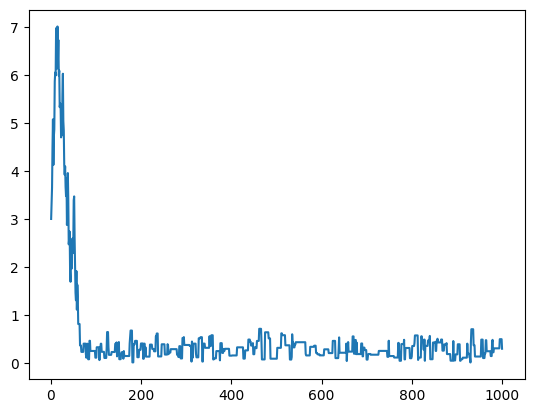

In [58]:
plt.plot(X5,Y55)

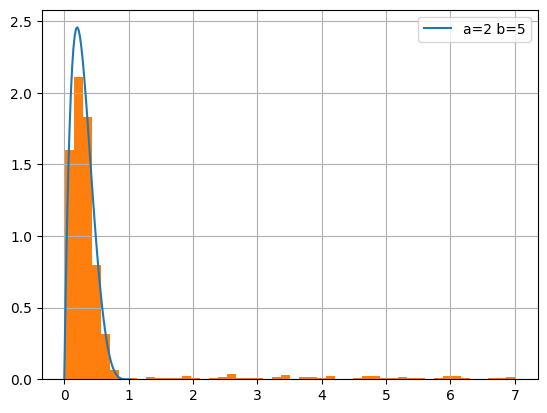

In [59]:
plt.plot(X, Y5,label='a=2 b=5')
plt.hist(Y55,bins=50,density=True)
plt.legend()
plt.grid()

**Ejercicio 6:** <br>
Prueba tu función del algoritmo de Metropolis-Hastings usando 10,000 iteraciones y un periodo de quemado de 1000 para tres de las densidades Beta del Ejercicio 1.<br>
En cada caso grafica el histograma de las muestras junto con la densidad las variables simuladas y varía r para ver si cambian los resultados.

In [60]:
X6=np.linspace(1,10000,10000)

##### a=0.5 b=0.5

In [61]:
def densidad1 (x):
  return densidad (0.5,0.5,x)

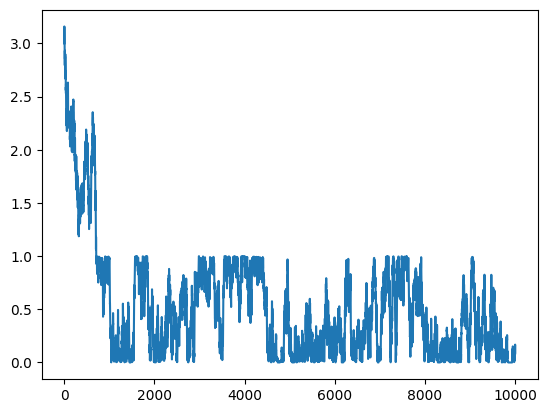

In [79]:
Y61=MetHas(10000,3,densidad1,0.1)
plt.plot(X6,Y61)

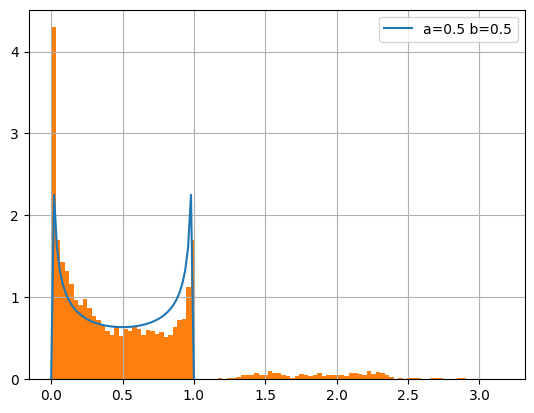

In [80]:
plt.plot(X, Y1,label='a=0.5 b=0.5')
plt.hist(Y61,bins=100,density=True)
plt.legend()
plt.grid()
#Se puede ver que el histograma si cumple la forma de mi función deseada, pero al haber una cantidad considerable de elementos fuera de esta, el histograma se alarga

##### a=2 b=2

In [65]:
def densidad2 (x):
  return densidad (2,2,x)

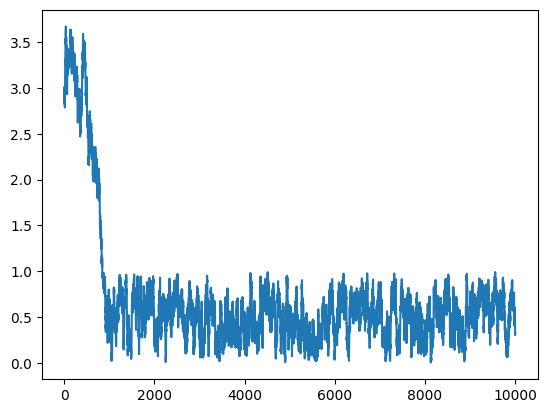

In [85]:
Y62=MetHas(10000,3,densidad2,0.1)
plt.plot(X6,Y62)

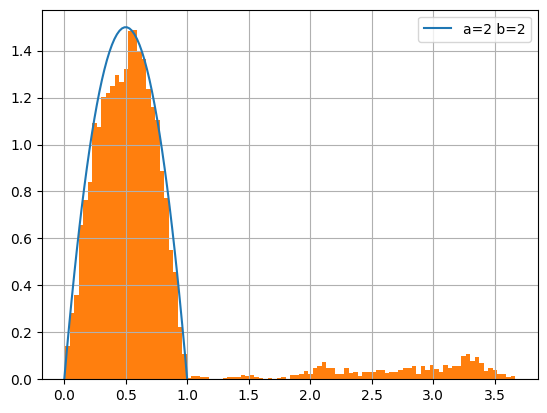

In [86]:
plt.plot(X, Y4,label='a=2 b=2')
plt.hist(Y62,bins=100,density=True)
plt.legend()
plt.grid()

#####a=5 b=1

In [69]:
def densidad3 (x):
  return densidad (5,1,x)

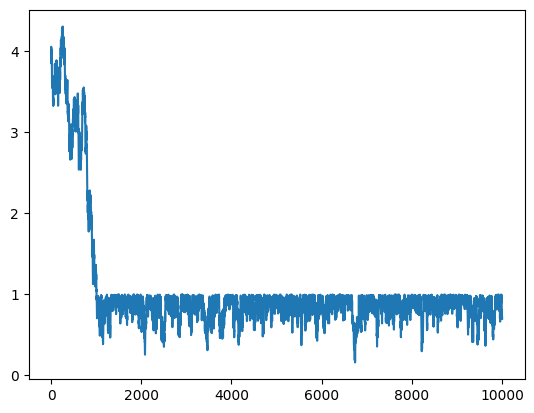

In [94]:
Y63=MetHas(10000,4,densidad3,0.1)
plt.plot(X6,Y63)

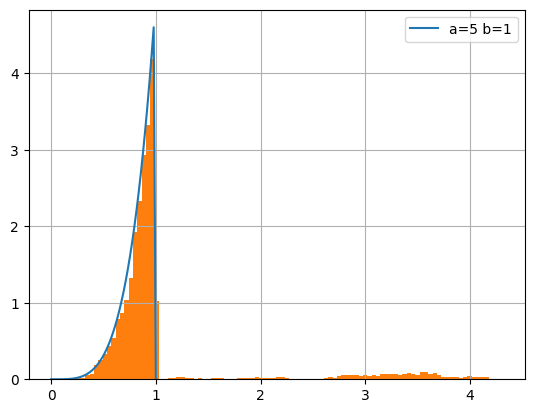

In [95]:
plt.plot(X, Y2,label='a=5 b=1')
plt.hist(Y63,bins=100,density=True)
plt.legend()
plt.grid()